In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix,ConfusionMatrixDisplay ,roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV ,KFold,cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


## Creating Functions:

In [2]:
def basic_information(df):
    print("Basic Information : \n")
    df.info()
    print("\n\nCorrelation plot : \n")
    plt.figure(figsize=(15,12))
    sns.heatmap(df.corr(), annot=True, cmap="Blues",linecolor='black', linewidths=0.5, fmt='.1g')
    plt.show()
    print("\n\nDescriptive Statistics : \n")
    return df.describe()

In [3]:
def lab_encode(df,column):
    label_encoder = preprocessing.LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    return df

In [4]:
def one_hot_encoder(df,columns):
    ohe=OneHotEncoder(handle_unknown="ignore", sparse=False)
    for i in columns:
        x=pd.DataFrame(ohe.fit_transform(df[[i]]), columns=df[i].unique())
        df = pd.concat([x,df], axis=1, join="inner").drop(i,axis=1)
    return df

In [5]:
from sklearn.preprocessing import MinMaxScaler

def MinMax_scaler(data):
    scaler = MinMaxScaler()
    scaler = scaler.fit(data)
    scaled_data = scaler.transform(data)
    return scaled_data

In [6]:
# function to find the best parameters using GridSearchCV
# kernel = []
# def grid_search(x_train,y_train):
#     param_grid = [{"kernel" : ['linear', 'poly', 'rbf', 'sigmoi'],
#                'C':np.geomspace(1e-3, 1e3, 7).tolist(), 'gamma': np.geomspace(1e-2, 1e1, 7).tolist()}]    
#     gsv = GridSearchCV(SVC( random_state=42), param_grid, verbose = 300)
#     gsv.fit(x_train,y_train)
#     print(gsv.best_score_ ,'\n',"\n" , gsv.best_params_)
#     var = gsv.best_params_['kernel']
#     kernel.append(var)

In [7]:
# #function to find value of c with accuarcy
# def c(x_train, y_train):
#     print(f'Regularization(C) \n\n')
#     for i in np.geomspace(1e-3, 1e3, 7 ).tolist():
#         model = SVC(C =i, gamma = 0.01 , kernel= kernel[0],random_state=42)
#         model.fit(x_train, y_train)
#         print(f'Value of C {i} : Train_Accuracy {model.score(x_train, y_train)} : Test_Accuracy {model.score(x_test, y_test)}')

In [8]:
def cm_clreport(y_test,preds):
    cm=confusion_matrix(y_test,preds)
    print(cm)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm,annot=True)
    plt.show()
    print(classification_report(y_test, preds))

In [9]:
def roc_auc(y_test,preds):
    fpr, tpr, thresholds = roc_curve(y_test, preds)

    plt.figure(figsize=(6,4))

    plt.plot(fpr, tpr, linewidth=2)

    plt.plot([0,1], [0,1], 'k--' )

    plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

    plt.xlabel('False Positive Rate (1 - Specificity)')
  
    plt.ylabel('True Positive Rate (Sensitivity)')
    auc = roc_auc_score(y_test, preds)
    print(f'\n\n ROC AUC score: {auc} \n\n')
    plt.show()

## Dataset - 2 : Salary

## Test dataset:

In [11]:
test = pd.read_csv("/content/SalaryData_Test(1).csv")
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


Data Description:

age -- age of a person

workclass	-- A work class is a grouping of work

education	-- Education of an individuals	

maritalstatus -- Marital status of an individulas

occupation	 -- occupation of an individuals

relationship -- 	

race --  Race of an Individual

sex --  Gender of an Individual

capitalgain --  profit received from the sale of an investment

capitalloss	-- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week	

native -- Native of an individual

Salary -- salary of an individual

Basic Information : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


Correlation plot : 



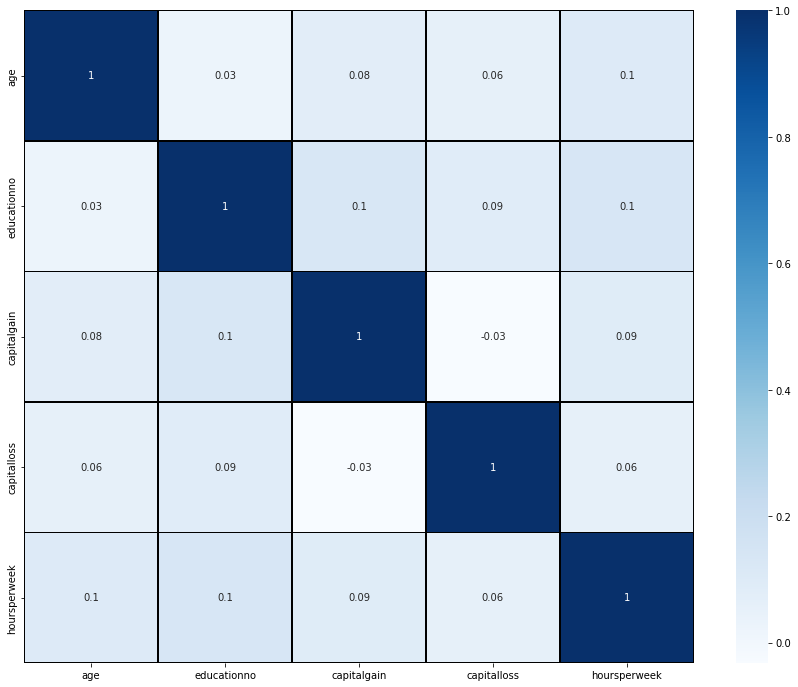



Descriptive Statistics : 



,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [12]:
basic_information(test)

In [13]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [14]:
test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [15]:
test.agg(["skew","kurt"])

,age,educationno,capitalgain,capitalloss,hoursperweek
skew,0.536112,-0.320999,11.570156,4.496738,0.359502
kurt,-0.181312,0.618468,143.591390,19.080685,3.267311


In [16]:
for i in test.columns :
    print(i , '\n', test[i].value_counts())

age 
 35    444
33    442
36    431
31    423
38    420
     ... 
85      2
88      2
89      1
87      1
84      1
Name: age, Length: 73, dtype: int64
workclass 
  Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64
education 
  HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64
educationno 
 9     4943
10    3221
13    2526
14     887
11     652
7      571
12     499
6      403
4      266
15     243
5      221
8      200
16     169
3      161
2       71
1       27
Name: educationno, dtype: int64
m

In [17]:
for i in test.columns:
    print(i , "\n" , test[i].unique())

age 
 [25 38 28 44 34 63 24 55 65 36 26 48 43 20 37 45 22 23 54 32 46 56 17 29
 39 52 18 21 42 33 30 47 41 19 69 50 31 59 49 58 40 27 57 61 51 73 53 80
 62 35 72 64 68 66 60 67 71 70 90 77 81 74 78 82 75 85 76 89 83 79 88 87
 84]
workclass 
 [' Private' ' Local-gov' ' Self-emp-not-inc' ' Federal-gov' ' State-gov'
 ' Self-emp-inc' ' Without-pay']
education 
 [' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' 5th-6th' ' Assoc-voc' ' 9th'
 ' Doctorate' ' 12th' ' 1st-4th' ' Preschool']
educationno 
 [ 7  9 12 10  6 15  4 13 14  3 11  5 16  8  2  1]
maritalstatus 
 [' Never-married' ' Married-civ-spouse' ' Widowed' ' Separated'
 ' Divorced' ' Married-spouse-absent' ' Married-AF-spouse']
occupation 
 [' Machine-op-inspct' ' Farming-fishing' ' Protective-serv'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-support' ' Sales' ' Priv-house-serv'
 ' Transport-moving' ' Handlers-cleaners' ' 

In [18]:
# find categorical and numeric variables

categorical = [var for var in test.columns if test[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n', categorical)
print('\n')
numeric = [var for var in test.columns if test[var].dtype!='O']
print('There are {} Numeric variables\n'.format(len(numeric)))
print('The Numeric variables are :\n', numeric)

There are 9 categorical variables

The categorical variables are :
 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


There are 5 Numeric variables

The Numeric variables are :
 ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

<Figure size 432x288 with 0 Axes>

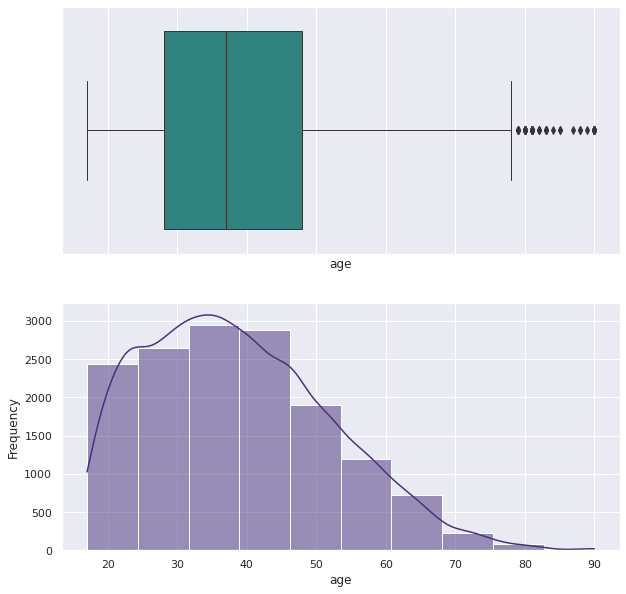

<Figure size 720x720 with 0 Axes>

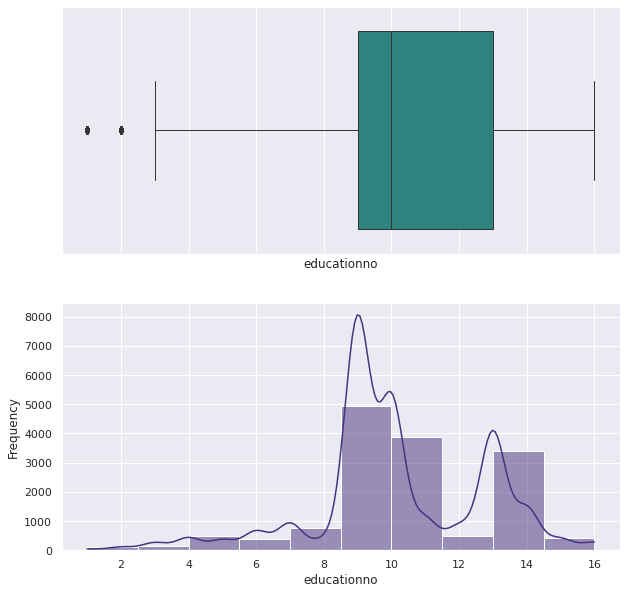

<Figure size 720x720 with 0 Axes>

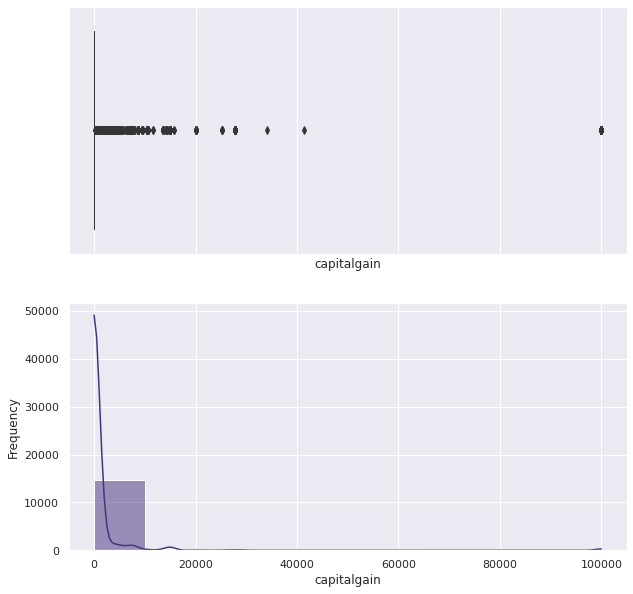

<Figure size 720x720 with 0 Axes>

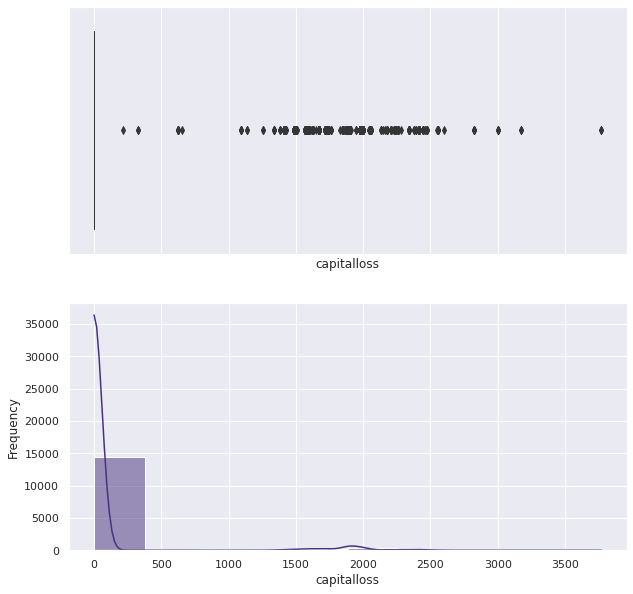

<Figure size 720x720 with 0 Axes>

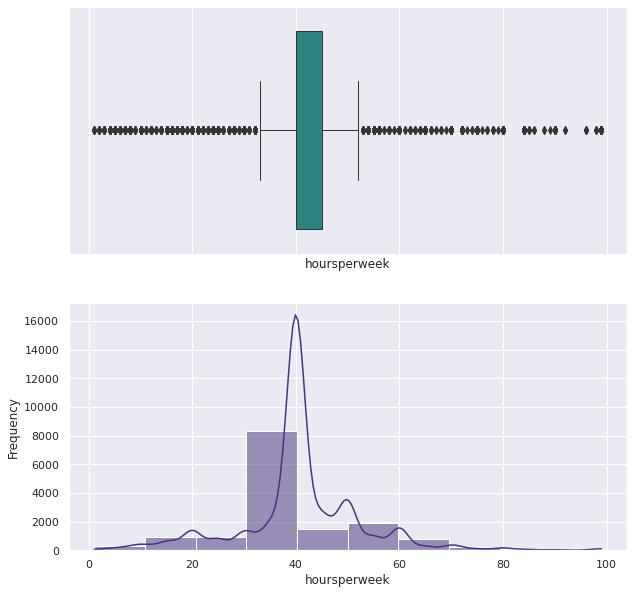

In [19]:
for i in numeric:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(10, 10)}, palette="viridis")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(test[i], ax=ax_box , linewidth= 1.0, palette="viridis")
    sns.histplot(test[i], ax=ax_hist , bins = 10,kde=True, palette="viridis")

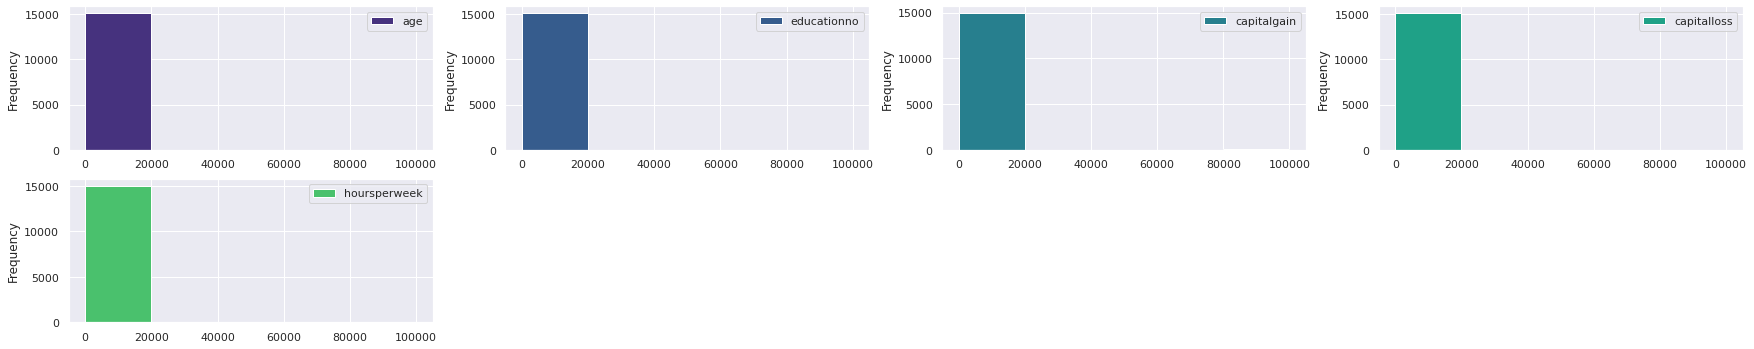

In [20]:
plt.rcParams['figure.figsize']=(30,28)

test.plot(kind='hist', bins=5, subplots=True, layout=(9,4), sharex=False, sharey=False)

plt.show()

### Applying encoding for catogorical Data

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


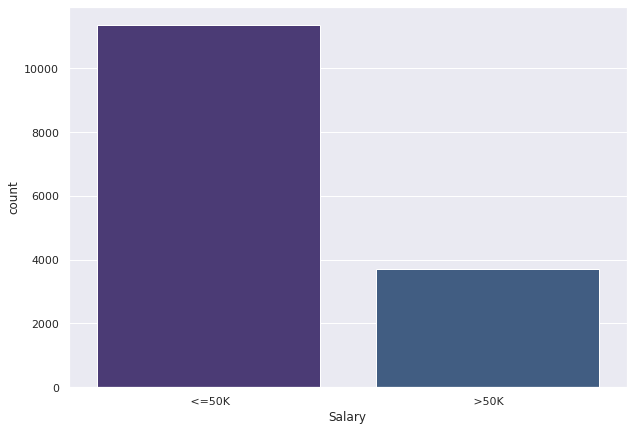

In [21]:
plt.figure(figsize=(10,7))
sns.countplot(test["Salary"])
plt.show()

In [22]:
#encoding y variable
df = lab_encode(test,"Salary")
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


Skew: 1.181631341594894
Kurtosis: -0.603827579784562


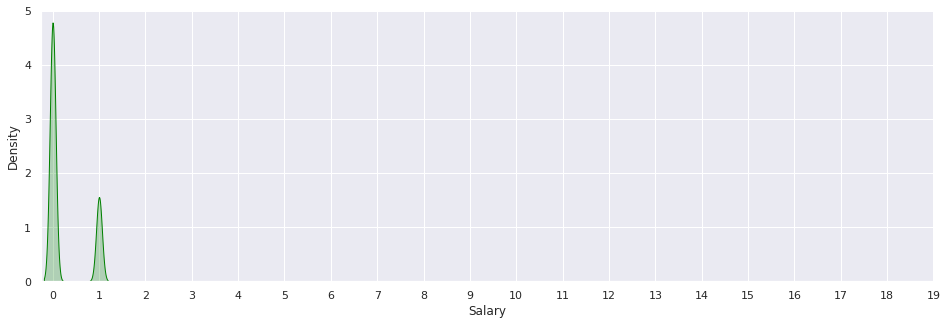

In [23]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(test["Salary"].skew()))
print("Kurtosis: {}".format(test["Salary"].kurtosis()))
ax = sns.kdeplot(test["Salary"],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

In [24]:
#removing unnecessary columns:
test_data = test.drop(columns = ["native"])
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,0
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,0
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,0
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,0


In [25]:
#encoding x variable
columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex"]
test_1= one_hot_encoder(test_data,columns)
test_1

,Male,Female,Black,White,Other,Amer-Indian-Eskimo,Asian-Pac-Islander,Own-child,Husband,Not-in-family,...,Federal-gov,State-gov,Self-emp-inc,Without-pay,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,25,7,0,0,40,0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,38,9,0,0,50,0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,28,12,0,0,40,1
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,44,10,7688,0,40,1
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,34,6,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,33,13,0,0,40,0
15056,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,39,13,0,0,36,0
15057,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,38,13,0,0,50,0
15058,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,44,13,5455,0,40,0


## Train Dataset:

In [26]:
train = pd.read_csv("/content/SalaryData_Train(1).csv")
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Basic Information : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


Correlation plot : 



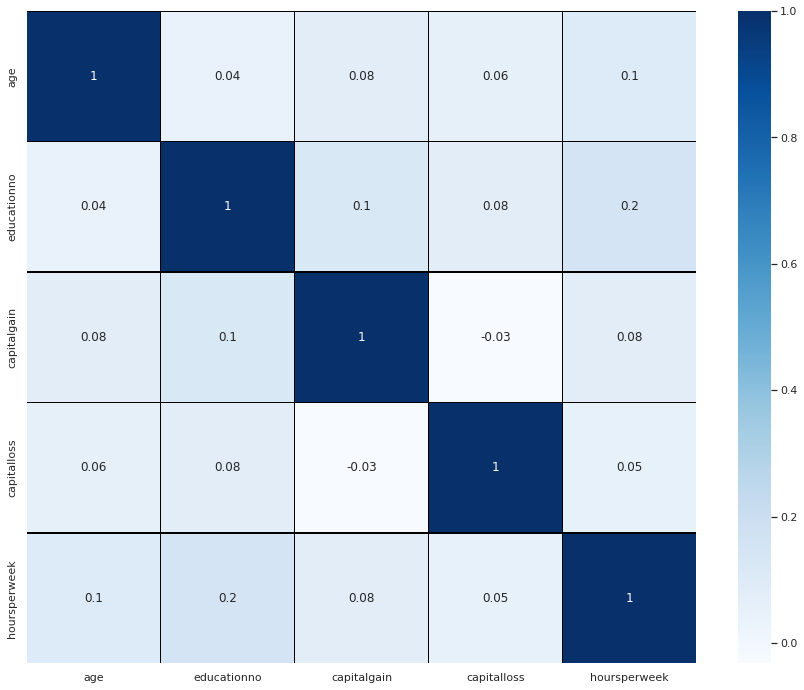



Descriptive Statistics : 



,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [27]:
basic_information(train)

In [28]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [29]:
train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [30]:
train.agg(["skew","kurt"])

,age,educationno,capitalgain,capitalloss,hoursperweek
skew,0.53018,-0.305378,11.902483,4.528238,0.330856
kurt,-0.14476,0.643605,153.661174,19.529284,3.167683


In [31]:
for i in train.columns :
    print(i , '\n', train[i].value_counts())

age 
 36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64
workclass 
  Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
education 
  HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
educationno 
 9     9840
10    6677
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: educationno, dtype: int64
m

In [32]:
for i in train.columns:
    print(i , "\n" , train[i].unique())

age 
 [39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86]
workclass 
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
educationno 
 [13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]
maritalstatus 
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation 
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-ho

In [33]:
# find categorical and numeric variables

categorical = [var for var in train.columns if train[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n', categorical)
print('\n')
numeric = [var for var in train.columns if train[var].dtype!='O']
print('There are {} Numeric variables\n'.format(len(numeric)))
print('The Numeric variables are :\n', numeric)

There are 9 categorical variables

The categorical variables are :
 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


There are 5 Numeric variables

The Numeric variables are :
 ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

<Figure size 2160x2016 with 0 Axes>

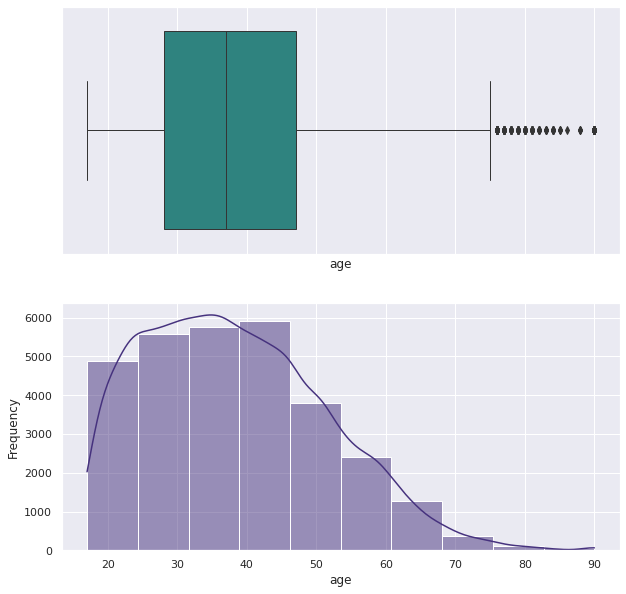

<Figure size 720x720 with 0 Axes>

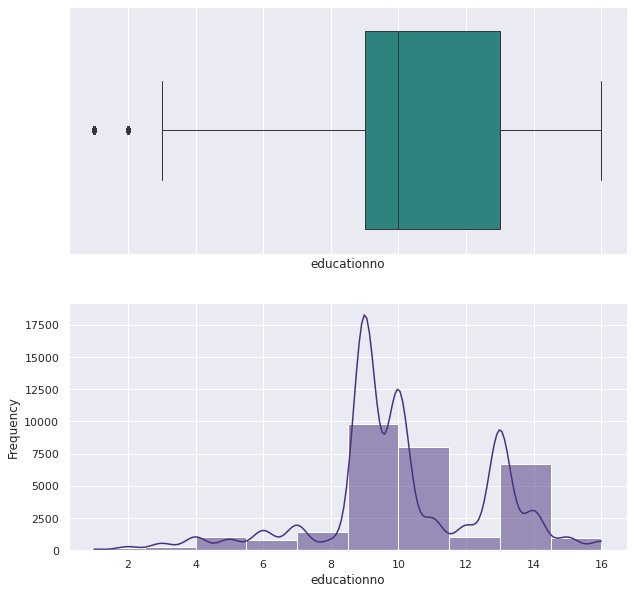

<Figure size 720x720 with 0 Axes>

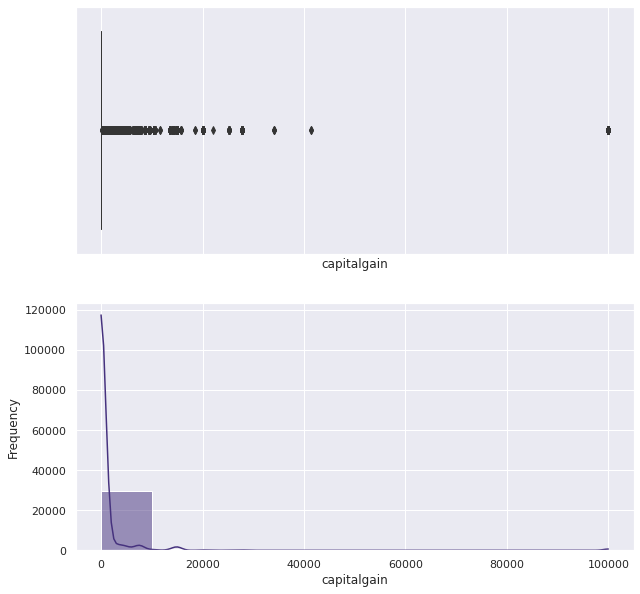

<Figure size 720x720 with 0 Axes>

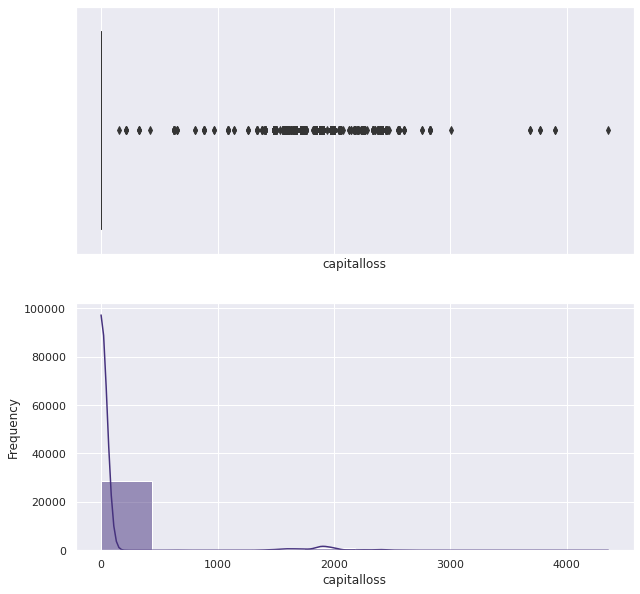

<Figure size 720x720 with 0 Axes>

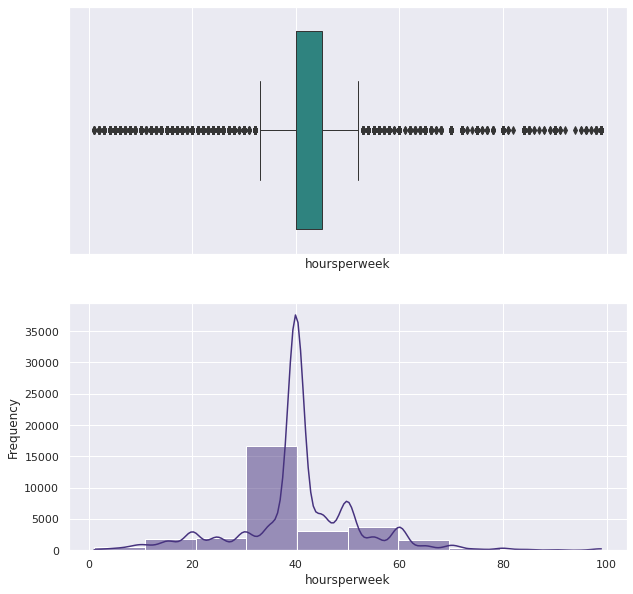

In [34]:
for i in numeric:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(10, 10)}, palette="viridis")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(train[i], ax=ax_box , linewidth= 1.0, palette="viridis")
    sns.histplot(train[i], ax=ax_hist , bins = 10,kde=True, palette="viridis")

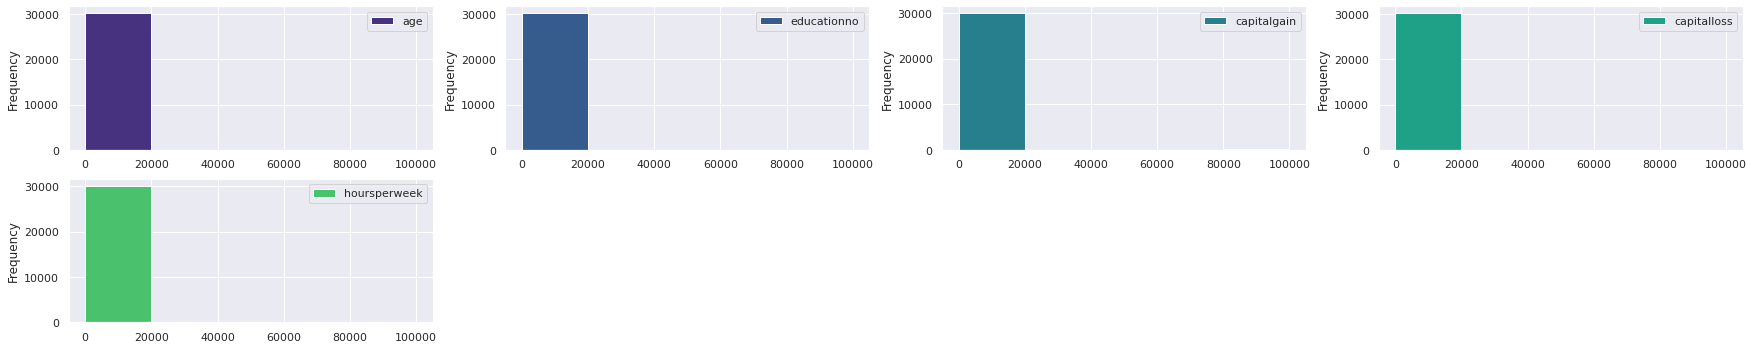

In [35]:
plt.rcParams['figure.figsize']=(30,28)

train.plot(kind='hist', bins=5, subplots=True, layout=(9,4), sharex=False, sharey=False)

plt.show()

### Applying encoding for catogorical Data

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


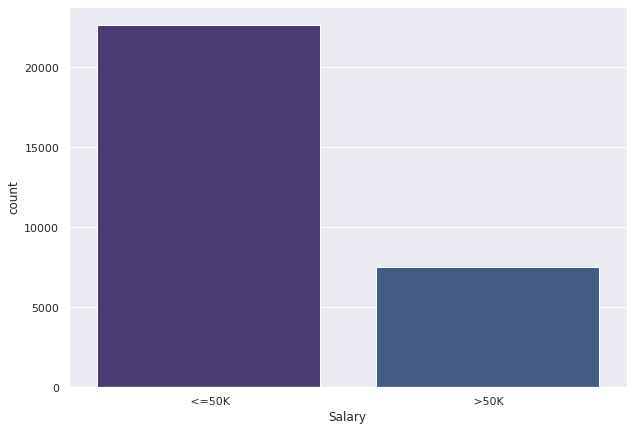

In [36]:
plt.figure(figsize=(10,7))
sns.countplot(train["Salary"])
plt.show()

In [37]:
#encoding y variable
train = lab_encode(train,"Salary")
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


Skew: 1.161357376751102
Kurtosis: -0.6512922355714985


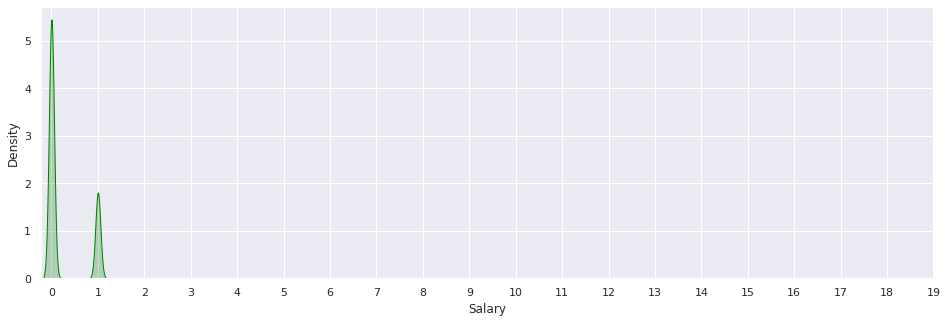

In [38]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(train["Salary"].skew()))
print("Kurtosis: {}".format(train["Salary"].kurtosis()))
ax = sns.kdeplot(train["Salary"],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

In [39]:
#removing unnecessary columns:
train_data = train.drop(columns = ["native"])
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,0
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,1
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,0
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,0


In [40]:
#encoding x variable
columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex"]
train_1 = one_hot_encoder(train_data,columns)
train_1

,Male,Female,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other,Not-in-family,Husband,Wife,...,Federal-gov,Local-gov,Self-emp-inc,Without-pay,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,39,13,2174,0,40,0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,50,13,0,0,13,0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,38,9,0,0,40,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,53,7,0,0,40,0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,28,13,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,27,12,0,0,38,0
30157,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,40,9,0,0,40,1
30158,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,58,9,0,0,40,0
30159,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,22,9,0,0,20,0


In [41]:
train_data =MinMax_scaler(train_1)
train_data = pd.DataFrame(train_data, columns = train_1.columns)
test_data =MinMax_scaler(test_1)
test_data = pd.DataFrame(test_data, columns = test_1.columns)
train_data


,Male,Female,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other,Not-in-family,Husband,Wife,...,Federal-gov,Local-gov,Self-emp-inc,Without-pay,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.301370,0.800000,0.021740,0.0,0.397959,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.452055,0.800000,0.000000,0.0,0.122449,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.287671,0.533333,0.000000,0.0,0.397959,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.493151,0.400000,0.000000,0.0,0.397959,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.150685,0.800000,0.000000,0.0,0.397959,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.136986,0.733333,0.000000,0.0,0.377551,0.0
30157,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.315068,0.533333,0.000000,0.0,0.397959,1.0
30158,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.561644,0.533333,0.000000,0.0,0.397959,0.0
30159,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.068493,0.533333,0.000000,0.0,0.193878,0.0


In [42]:
train_data.shape , test_data.shape

((30161, 63), (15060, 63))

0.0    22653
1.0     7508
Name: Salary, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


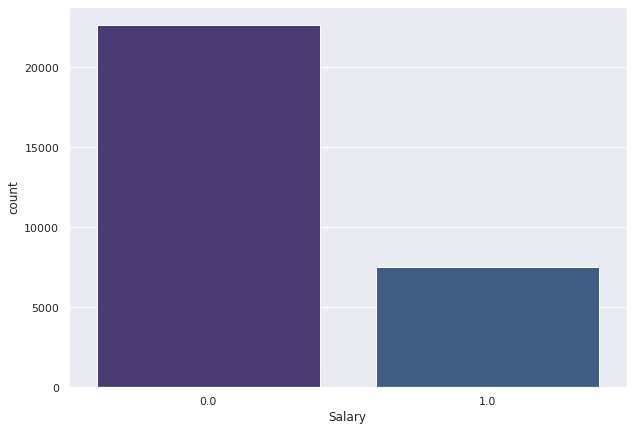

In [43]:
print(train_data['Salary'].value_counts())
plt.figure(figsize=(10,7))
sns.countplot(train_data['Salary'])
plt.show()

0.0    11360
1.0     3700
Name: Salary, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


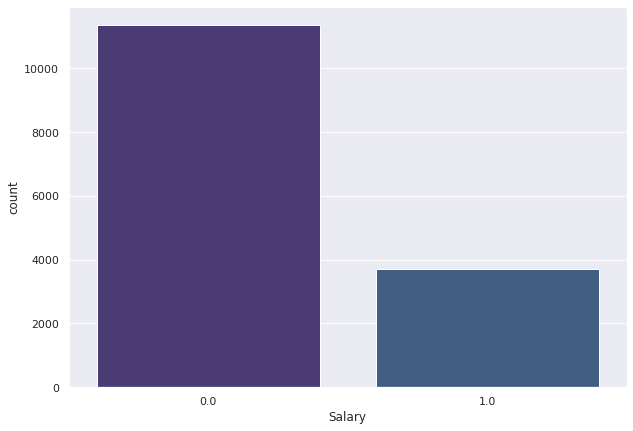

In [44]:
print(test_data['Salary'].value_counts())
plt.figure(figsize=(10,7))
sns.countplot(test_data['Salary'])
plt.show()

* **Here the data is imbalanced ,so for balancing here we use SMOTE to resample the data.**

In [45]:
x_train = train_data.iloc[:,0:62]
y_train = train_data.iloc[:,62]

x_test = test_data.iloc[:,0:62]
y_test = test_data.iloc[:,62]


In [46]:
import imblearn
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(random_state=42)
x_train, y_train = over_sampler.fit_resample(x_train, y_train)
print(x_train.shape)
print(y_train.shape)

(45306, 62)
(45306,)


In [47]:
x_test, y_test= over_sampler.fit_resample(x_test, y_test)
print(x_test.shape)
print(y_test.shape)

(22720, 62)
(22720,)


In [48]:
pd.Series(y_test).value_counts()

0.0    11360
1.0    11360
Name: Salary, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


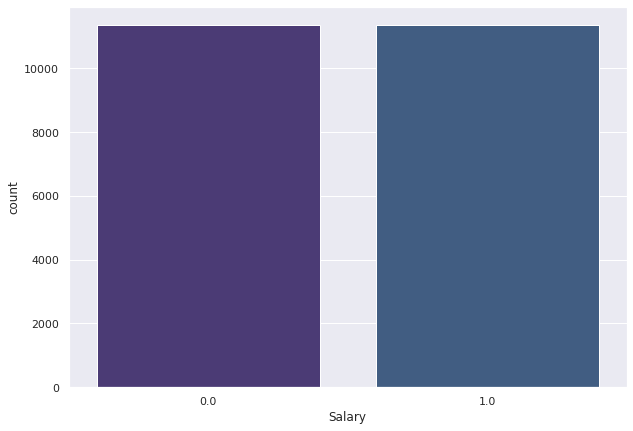

In [49]:
plt.figure(figsize=(10,7))
sns.countplot(y_test)
plt.show()

## Using Gridsearchcv to find best parameter:

In [50]:
# grid_search(x_train,y_train) 

In [51]:
# kernel

###  Visualizing C value with respect to traing and testing accuracy:

In [52]:
# c(x_train, y_train)

In [53]:
# creating empty list variable 
# acc = []

# # storing the accuracy values

# for i in np.geomspace(1e-3, 1e3, 7 ).tolist():
#         model = SVC(C =1000, kernel= "linear",random_state=42)
#         model.fit(x_train, y_train)
#         train_acc = np.mean(model.predict(x_train) == y_train)
#         test_acc = np.mean(model.predict(x_test) == y_test)
#         acc.append([train_acc, test_acc])


# # train accuracy plot 
# plt.figure(figsize=(10,7))
# plt.plot(np.geomspace(1e-3, 1e3, 7 ).tolist(),[i[0] for i in acc],"ro-")

# # test accuracy plot
# plt.plot(np.geomspace(1e-3, 1e3, 7 ).tolist(),[i[1] for i in acc],"bo-")

* **from above visualiztion we come up with the conclusion that the regularization(c) = 1000 gives us a best accuracy score with linear model.**

## Model building:

* C= which defines the regularization of the error.
* kernel= which defines what type of function is used to transform the dataset
* gamma= defines how loosely the model will fit the training data, allowing you to prevent overfitting

In [75]:
model = SVC(C =10, kernel="rbf" , gamma = 0.01,random_state=10,verbose = 100)
model

SVC(C=10, gamma=0.01, random_state=10, verbose=100)

In [76]:
model.fit(x_train,y_train)

[LibSVM]

SVC(C=10, gamma=0.01, random_state=10, verbose=100)

In [77]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


1.0    12593
0.0    10127
dtype: int64

In [78]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(x_test, y_test)))

Training set score: 0.8193


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


Test set score: 0.8191


In [79]:
# print the scores between dependent test and predicted value

print("Accuracy_score", accuracy_score(y_test,preds)*100)

Accuracy_score 81.90580985915493


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


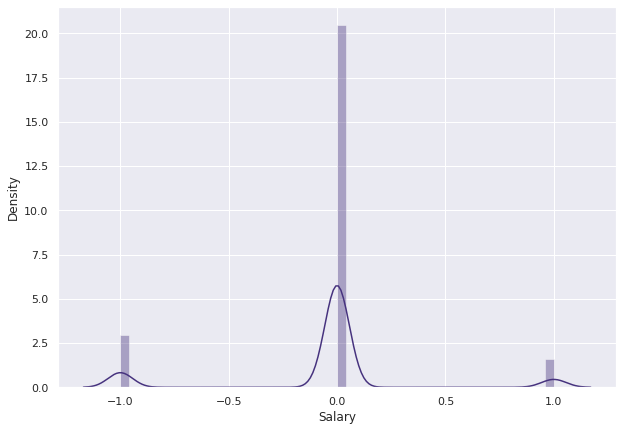

In [80]:
# checking difference between labled y and predicted y
plt.figure(figsize=(10,7))
sns.distplot(y_test-preds)
plt.show()

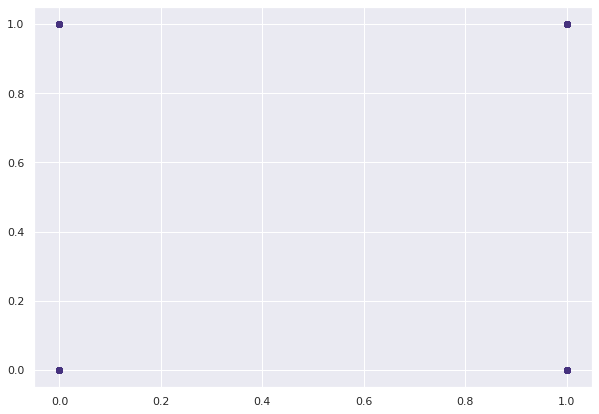

In [81]:
plt.figure(figsize=(10,7))
plt.scatter(y_test,preds)
plt.show()

In [82]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':preds})
df.head(5)

,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,0.0,0.0


[[8688 2672]
 [1439 9921]]


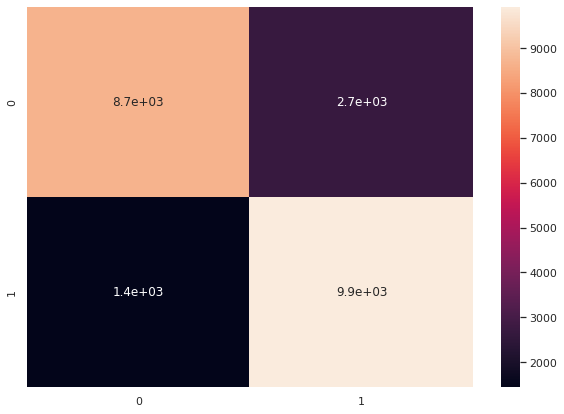

              precision    recall  f1-score   support

         0.0       0.86      0.76      0.81     11360
         1.0       0.79      0.87      0.83     11360

    accuracy                           0.82     22720
   macro avg       0.82      0.82      0.82     22720
weighted avg       0.82      0.82      0.82     22720



In [83]:
cm_clreport(y_test,preds)



 ROC AUC score: 0.8190580985915492 




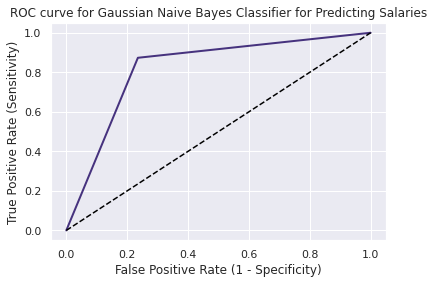

In [84]:
roc_auc(y_test,preds)